In [1]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('X.pickle', 'rb') as handle:
    X = pickle.load(handle)
with open('Y.pickle', 'rb') as handle:
    Y = pickle.load(handle)
    

with open('X_new.pickle', 'rb') as handle:
    X_new = pickle.load(handle)
with open('Y_new.pickle', 'rb') as handle:
    Y_new = pickle.load(handle)

## Data Analysis
Included are plots to see if the features I have chosen can be a good indicator of whether a game will rank. For RankSVM, I will use the differences of features to predict the outcomes of pairwise comparisons, so I will check if these features are a good indicator.

In [3]:
(l,m,n) = X.shape
X_rank = []
X_unrank = []
for i in range(0,48): #month range
    for j in range(0,m):
        if Y[i,j] != 100:
            X_rank.append(list(X[i,j]))
        else:
            X_unrank.append(list(X[i,j]))
aX_rank = np.array(X_rank).T
aX_unrank = np.array(X_unrank).T



In [4]:
Xnew_win = []
for j in range(0,len(X_new)):
    if Y_new[j] == -1:
        Xnew_win.append(X_new[j])
    else:
        v = [-1*a for a in X_new[j]]
        Xnew_win.append(v)
aXnew_win = np.array(Xnew_win).T

In [5]:
X_w = []
X_l = []
np.random.seed(2)
PRNG = np.random.rand(len(X_new))
for j in range(0,len(X_new)):
    if PRNG[j] < 0.001:
        if Y_new[j] == -1:
            X_w.append(X_new[j])
        else:
            X_l.append(X_new[j])
    else:
        pass
aX_w = np.array(X_w).T
aX_l = np.array(X_l).T

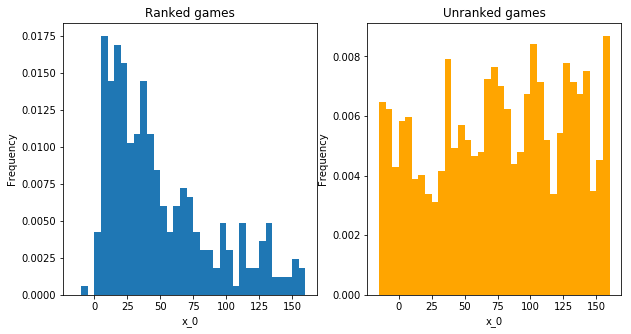

In [6]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize = (10,5))
ax2.hist(aX_unrank[0,:],[-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160], density=1, color = 'orange');
ax2.set_ylabel('Frequency');
ax2.set_xlabel('x_0');
ax2.set_title('Unranked games');

ax1.hist(aX_rank[0,:],[-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160], density=1);
ax1.set_ylabel('Frequency');
ax1.set_xlabel('x_0');
ax1.set_title('Ranked games');

The games that rank appear are often released very recently (within a few months) but drops off significantly within the last 5 days of the month since there is not enough time to generate much salehe list of unranked games are fairly uniformly distributed over this time range. This led to me introducing the 6th feature.

The following are features related to peaks in search history: all time, from previous month, from 2 months ago, from 3 months ago

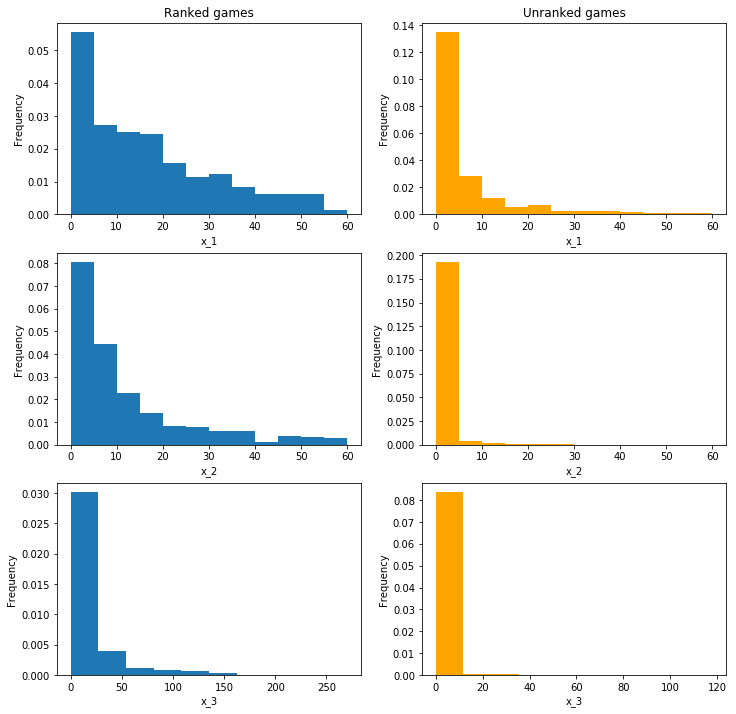

In [7]:
fig,ax = plt.subplots(3,2,figsize = (12,12))
([ax1,ax2],[ax3,ax4],[ax5,ax6]) = ax

ax1.hist(aX_rank[1,:], [0,5,10,15,20,25,30,35,40,45,50,55,60],density=1);
ax1.set_title('Ranked games');
ax1.set_ylabel('Frequency');
ax1.set_xlabel('x_1');

ax2.hist(aX_unrank[1,:], [0,5,10,15,20,25,30,35,40,45,50,55,60],density=1, color = 'orange');
ax2.set_title('Unranked games');
ax2.set_ylabel('Frequency');
ax2.set_xlabel('x_1');

ax3.hist(aX_rank[2,:],[0,5,10,15,20,25,30,35,40,45,50,55,60], density=1);
ax3.set_ylabel('Frequency');
ax3.set_xlabel('x_2');

ax4.hist(aX_unrank[2,:], [0,5,10,15,20,25,30,35,40,45,50,55,60], density=1, color = 'orange');
ax4.set_ylabel('Frequency');
ax4.set_xlabel('x_2');

ax5.hist(aX_rank[3,:], density=1);
ax5.set_ylabel('Frequency');
ax5.set_xlabel('x_3');

ax6.hist(aX_unrank[3,:], density=1, color = 'orange');
ax6.set_ylabel('Frequency');
ax6.set_xlabel('x_3');

Frequency for the added feature, x_5. It is +1 if the game searches peaked between 5-55 days ago and -1 otherwise:

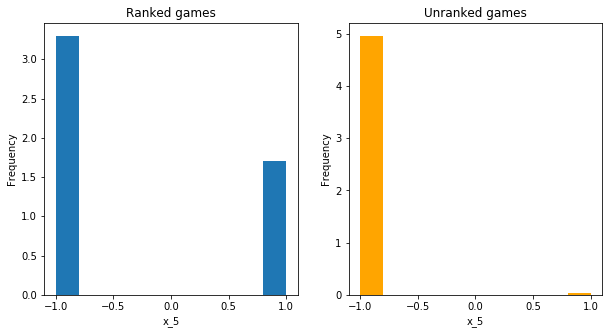

In [8]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize = (10,5))
ax2.hist(aX_unrank[5,:], density=1, color = 'orange');
ax2.set_ylabel('Frequency');
ax2.set_xlabel('x_5');
ax2.set_title('Unranked games');

ax1.hist(aX_rank[5,:], density=1);
ax1.set_ylabel('Frequency');
ax1.set_xlabel('x_5');
ax1.set_title('Ranked games');

The following are various scatter plots of a subset of the data to see if training a classifier would be a good idea. These features are generated from the differences of the features of two games, and winning and losing comparisons are plotted.

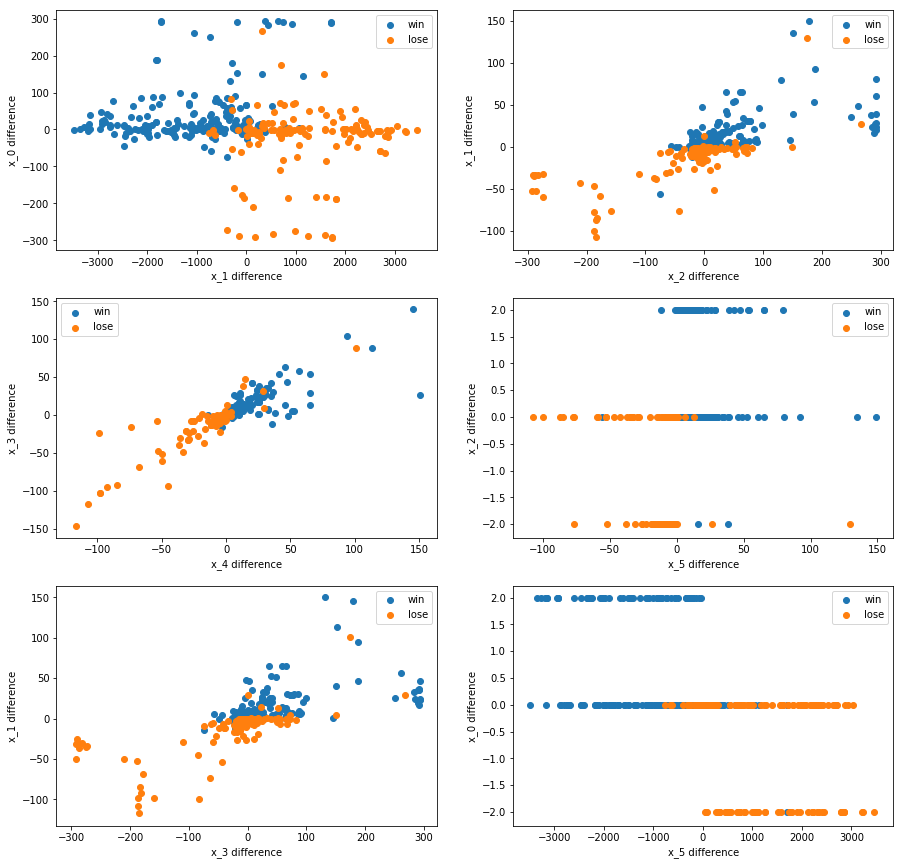

In [9]:
fig, ax = plt.subplots(3,2,figsize = (15,15))

([ax1,ax2],[ax3,ax4],[ax5,ax6]) = ax

ax1.scatter(aX_w[0,:], aX_w[1,:]);
ax1.scatter(aX_l[0,:], aX_l[1,:]);
ax1.set_ylabel('x_0 difference');
ax1.set_xlabel('x_1 difference');
ax1.legend(['win','lose']);

ax2.scatter(aX_w[1,:], aX_w[2,:]);
ax2.scatter(aX_l[1,:], aX_l[2,:]);
ax2.set_ylabel('x_1 difference');
ax2.set_xlabel('x_2 difference');
ax2.legend(['win','lose']);

ax3.scatter(aX_w[3,:], aX_w[4,:]);
ax3.scatter(aX_l[3,:], aX_l[4,:]);
ax3.set_ylabel('x_3 difference');
ax3.set_xlabel('x_4 difference');
ax3.legend(['win','lose']);

ax4.scatter(aX_w[2,:], aX_w[5,:]);
ax4.scatter(aX_l[2,:], aX_l[5,:]);
ax4.set_ylabel('x_2 difference');
ax4.set_xlabel('x_5 difference');
ax4.legend(['win','lose']);

ax5.scatter(aX_w[1,:], aX_w[3,:]);
ax5.scatter(aX_l[1,:], aX_l[3,:]);
ax5.set_ylabel('x_1 difference');
ax5.set_xlabel('x_3 difference');
ax5.legend(['win','lose']);

ax6.scatter(aX_w[0,:], aX_w[5,:]);
ax6.scatter(aX_l[0,:], aX_l[5,:]);
ax6.set_ylabel('x_0 difference');
ax6.set_xlabel('x_5 difference');
ax6.legend(['win','lose']);